In [1]:
import pandas as pd
import numpy as np
import sigfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
plt.rcParams.update(mpl.rcParamsDefault)

def rd(valor, error):
    return eval('("' + sigfig.round(valor, error, cutoff=19, sep ='","') + '")')


def tex(panda, columnas):
    l = len(panda)
    a = len(columnas)
    print('\\begin{array}{|' + 'l|'*a + '} \\hline')
    for fila in range(l):
        s = ''
        for col in columnas:
            s+= str(panda[col][fila]) + ' & '
        print(s[0: -2] + ' \\\\ \\hline')
    print('\\end{array}')

def regresion(x, y):
    n = len(x)
    xc = x.sum()/n
    yc = y.sum()/n
    sx = math.sqrt(((x**2).sum()/n)-xc**2)
    sy = math.sqrt(((y**2).sum()/n)-yc**2)
    sxy = ((x*y).sum()/n)-xc*yc
    r = sxy/(sx*sy)
    m = sxy/(sx**2)
    b = yc - m*xc
    em = (sy/sx)*math.sqrt((1-r**2)/(n-2))
    eb = em*math.sqrt(sx**2 + xc**2)
    return(m, b, em, eb, r)

In [2]:
def serie(r1, r2):
    print(rd(r1+r2, math.sqrt(2)))

def paralelo(r1, r2):
    print(rd(1/(1/r1 + 1/r2), 2*math.sqrt(1/r1**4 + 1/r2**4)/(1/r1 + 1/r2)))

In [3]:
serie(46,46)
serie(220,220)
serie(46,220)
paralelo(46,46)
paralelo(220,220)
paralelo(46,220)

('92.0', '1.4')
('440.0', '1.4')
('266.0', '1.4')
('23.00', '0.03')
('110.000', '0.006')
('38.05', '0.04')


In [4]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/interna/Datos/interna.csv', names=['r','v'])

In [5]:
datos['vr'] = datos['v']/datos['r']
datos['ev'] = 0.01
datos['er'] = 1
datos['evr'] = np.sqrt(0.01**2 +  datos['vr']**2)/datos['r']

In [6]:
for fila in range(len(datos)):
    a, b = datos['vr'][fila], datos['evr'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datos['vr'][fila], datos['evr'][fila] = a, b

C:\Users\User\AppData\Local\Temp/ipykernel_15976/4082510653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vr'][fila], datos['evr'][fila] = a, b


In [7]:
tex(datos, ['vr', 'evr', 'v'])

\begin{array}{|l|l|l|} \hline
0.183 & 0.004 & 8.4  \\ \hline
0.0937 & 0.001 & 8.71  \\ \hline
0.331 & 0.014 & 7.61  \\ \hline
0.04041 & 0.00019 & 8.89  \\ \hline
0.03326 & 0.00013 & 8.88  \\ \hline
0.214 & 0.006 & 8.14  \\ \hline
0.02052 & 5e-05 & 9.01  \\ \hline
0.0801 & 0.0007 & 8.81  \\ \hline
\end{array}


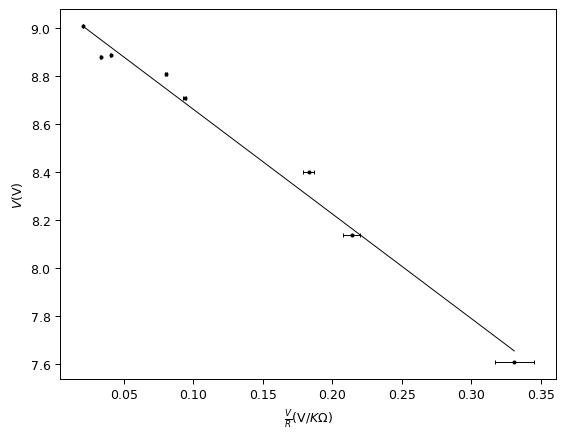

In [8]:
m, n, em, en, r = regresion(datos['vr'], datos['v'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.ylabel('$V$(V)')
plt.xlabel('$\\frac{V}{R}$(V/$K\Omega$)')
mm = min(datos['vr'])
MM = max(datos['vr'])
plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
plt.errorbar(datos['vr'], datos['v'], xerr=datos['evr'], ls='none', capsize = 1.5, elinewidth=0.7, ecolor='black', capthick=0.7)
plt.scatter(datos['vr'], datos['v'], s=4, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/interna/figures/regresión1.png', dpi=1000, bbox_inches='tight')
plt.show()

In [9]:
rd(m, em)

('-4.4', '0.2')

In [10]:
rd(n, en)

('9.10', '0.03')

In [11]:
res = [23, 46, 220]
d = dict()
for r in res:
    panda = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/interna/Datos/interna_'+str(r)+'.csv', names=['pos','v'])
    for fila in range(len(panda)):
        pos = panda['pos'][fila]
        vol = panda['v'][fila]
        if pos in d.keys():
            d[pos].append([vol/r, vol])
        else:
            d[pos] =[ [vol/r, vol] ]

          x     y      z
0  0.275217  6.33   23.0
1  0.159130  7.32   46.0
2  0.039000  8.58  220.0


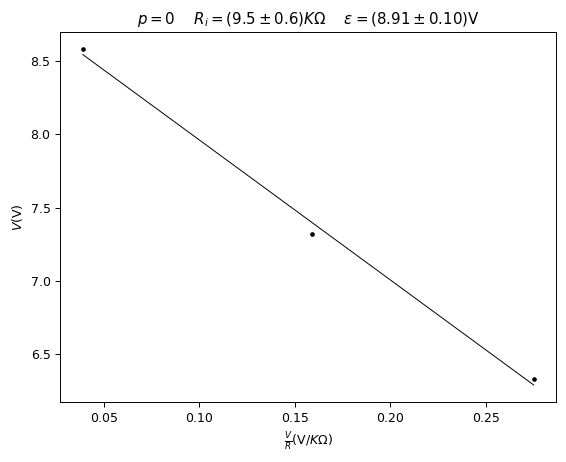

          x     y      z
0  0.015217  0.35   23.0
1  0.014130  0.65   46.0
2  0.010636  2.34  220.0


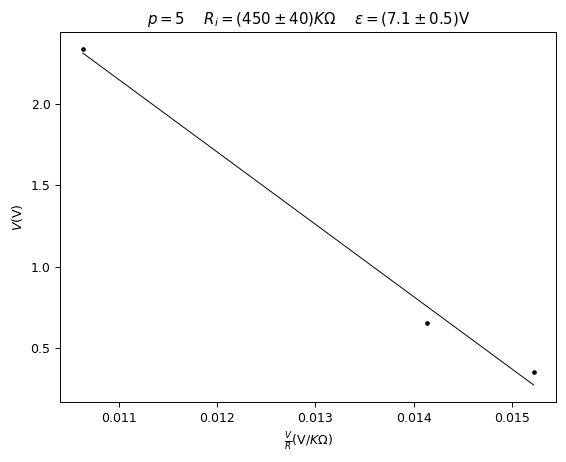

          x     y      z
0  0.007391  0.17   23.0
1  0.007174  0.33   46.0
2  0.005591  1.23  220.0


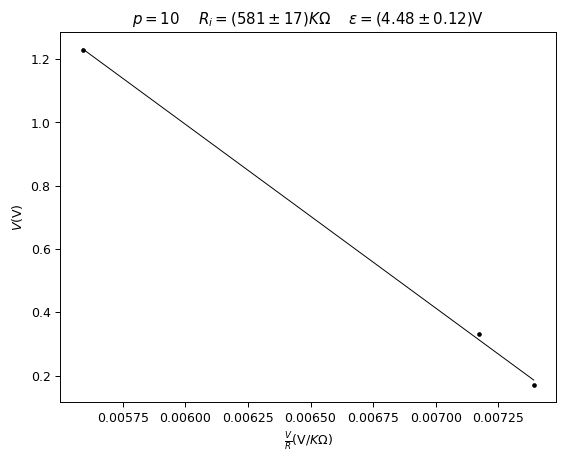

In [12]:
for pos in [0,5,10]:
    x = [i[0] for i in d[pos]]
    y = [i[1] for i in d[pos]]
    df = pd.DataFrame(list(zip(x,y)), columns=['x', 'y'])
    df['z'] = df['y']/df['x']
    print(df)
    x = df['x']
    y = df['y']
    m, n, em, en, r = regresion(x, y)
    plt.rcParams.update({'font.size': 9})
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.ylabel('$V$(V)')
    plt.xlabel('$\\frac{V}{R}$(V/$K\Omega$)')
    mm = min(x)
    MM = max(x)
    plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
    m, em = rd(m, em)
    n, en = rd(n, en)
    plt.title('$p='+str(pos)+'$    $R_i = ('+m[1:]+'\pm'+em+')K\Omega$    $\\varepsilon = ('+n+'\pm'+en+')$V')
    plt.scatter(x, y, s=6, c='black', marker='8')
    plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/interna/figures/regresión'+str(pos)+'.png', dpi=1000, bbox_inches='tight')
    plt.show()